In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [33]:
data = pd.read_csv("housing.csv")
data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
#Exploring data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
#So we have mostly non-null data. Just few null data in total_bedrooms section, so we clear these out.
# We get rid of NAN: Not a number data 
data.dropna(inplace= True) #inplace just replaces the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Now we decide what X, Y is and then portion of split for training data
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we combine just the training data and see what it looks like, what info we can get from it etc.

In [38]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3463,-118.45,34.31,28.0,1532.0,287.0,977.0,275.0,4.4773,<1H OCEAN,173100.0
2269,-119.79,36.79,33.0,3433.0,785.0,1806.0,783.0,1.9386,INLAND,67500.0
15650,-122.41,37.80,52.0,1999.0,642.0,1846.0,620.0,1.9145,NEAR BAY,225000.0
9234,-119.94,37.04,14.0,1636.0,253.0,766.0,225.0,3.1250,INLAND,88500.0
5481,-118.45,33.99,52.0,1829.0,472.0,779.0,424.0,3.1607,<1H OCEAN,339000.0
...,...,...,...,...,...,...,...,...,...,...
9599,-120.50,37.31,36.0,2162.0,433.0,1048.0,451.0,2.6797,INLAND,81800.0
10964,-117.88,33.78,26.0,3141.0,670.0,1572.0,724.0,3.3472,<1H OCEAN,237400.0
654,-122.15,37.71,18.0,5778.0,1526.0,2441.0,1352.0,3.1682,NEAR BAY,202700.0
8618,-118.38,33.86,12.0,4235.0,735.0,1798.0,683.0,6.4242,<1H OCEAN,365500.0


Now some basic data exploration follows.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

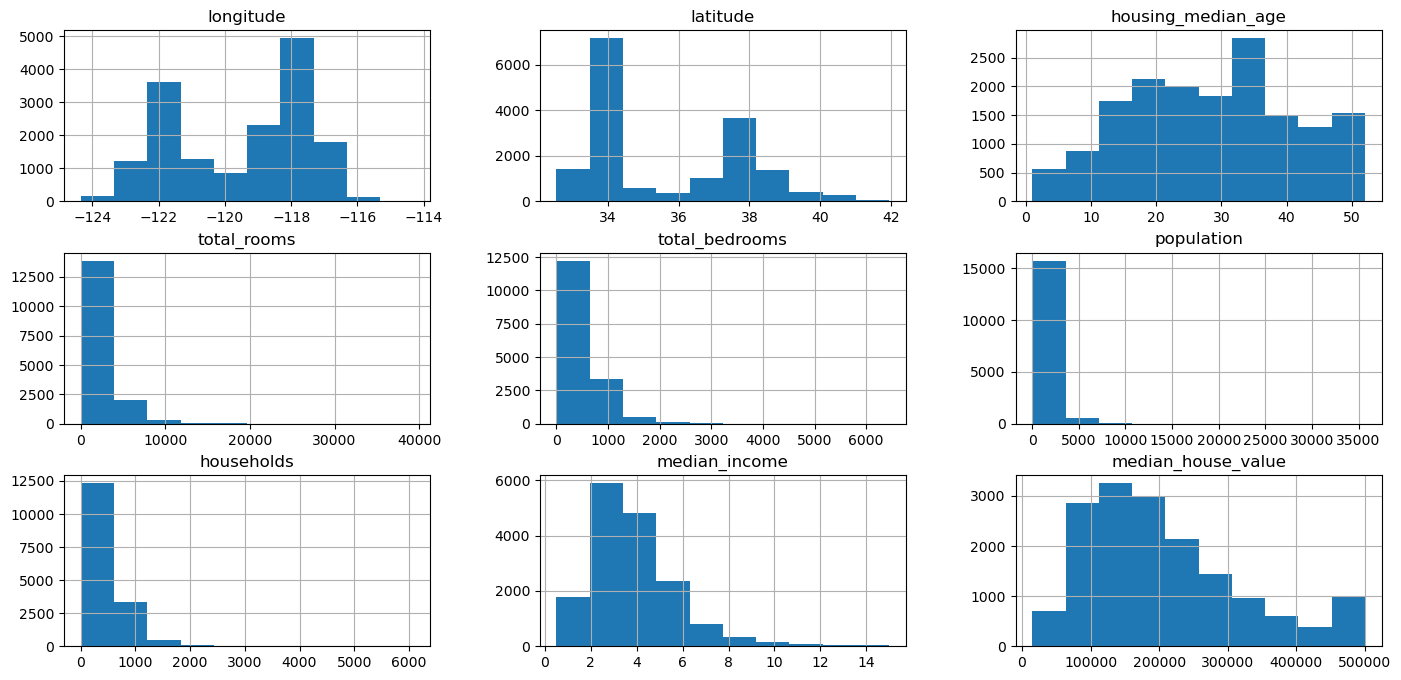

In [43]:
train_data.hist(figsize=(17,8))

<Axes: >

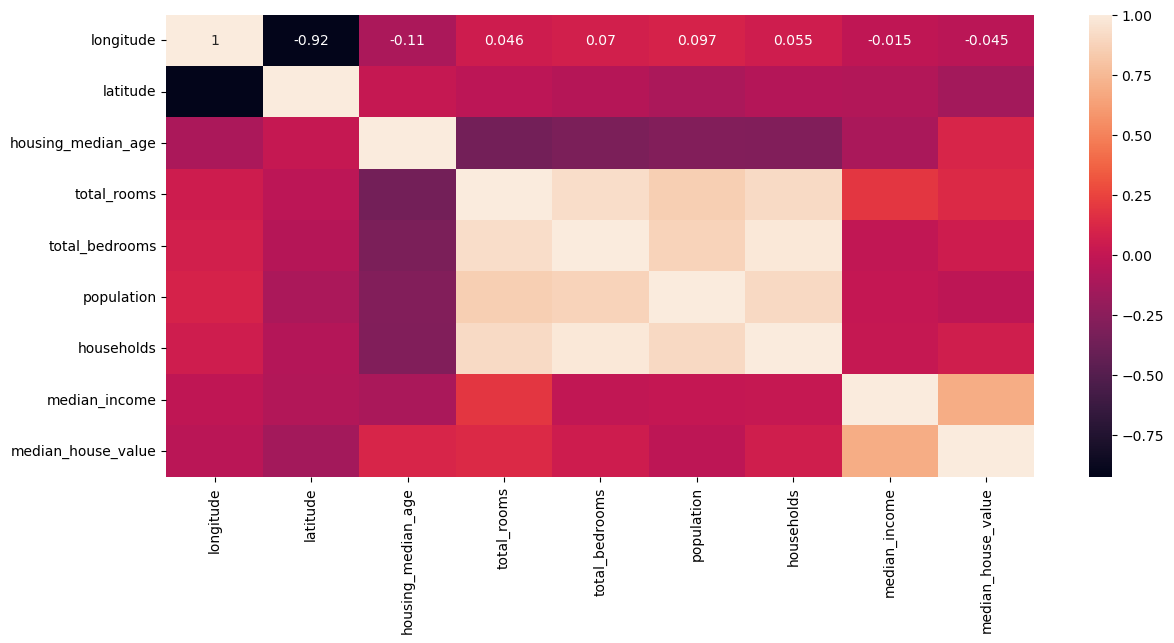

In [46]:
plt.figure(figsize=(14,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True) #, cmap="YlGnBu"